In [1]:
import numpy as np
from filterpy.kalman import EnsembleKalmanFilter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import time
from enkf import *

## Oscillateur harminique


In [2]:
X_0 = [2,0]


In [3]:
omega = 2
P = 2*np.pi/omega
dt = P/50
T = 3*P
N_t = int(round(T/dt))

oscillateur=RK4_Lorenz_harmonique(omega,X_0,N_t,T)

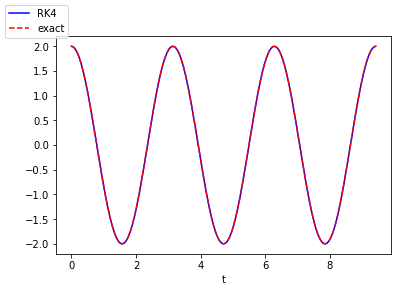

In [4]:
fig = plt.figure()
l1, l2 = plt.plot(oscillateur[2], oscillateur[0], 'b-', oscillateur[2], 2*np.cos(omega*oscillateur[2]), 'r--')
fig.legend((l1, l2), ('RK4', 'exact'), 'upper left')
plt.xlabel('t')
plt.show()

In [5]:

tab_etat_oscillateur,tab_temps_oscillateur=assimilation_oscillateur_harmonique()

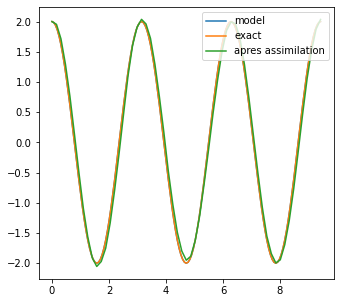

In [6]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur[2],oscillateur[0],label='model')
ax1.plot(oscillateur[2], 2*np.cos(omega*oscillateur[2]),label='exact')
ax1.plot(tab_temps_oscillateur,tab_etat_oscillateur,label='apres assimilation')
ax1.legend(loc='upper right')


## Lorenz

In [7]:
γ=(12.,6.,12.) #(σ,b,r)
X0=(-10.,-10.,25.) #(x0,y0,z0)
T=5
N=int(T/0.01)


In [8]:
lorenz1=RK4_Lorenz(γ,X0,N,T)

In [9]:

N=int(T/0.1)


In [10]:
lorenz2=RK4_Lorenz(γ,X0,N,T)

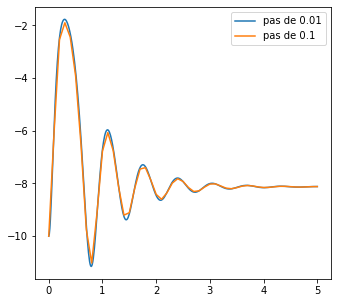

In [11]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="pas de 0.01")
ax1.plot(lorenz2[3],lorenz2[0],label="pas de 0.1")
ax1.legend()

In [12]:
 def hx(x):
   return x




γ=(12.,6.,12.)  #(σ,b,r)
N=10
T=5

x = np.array([-10.,-10.,25.])#(x0,y0,z0)
dt= N*0.01
P = np.eye(3) * 2.


def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])



### Assimilation juste avec le model

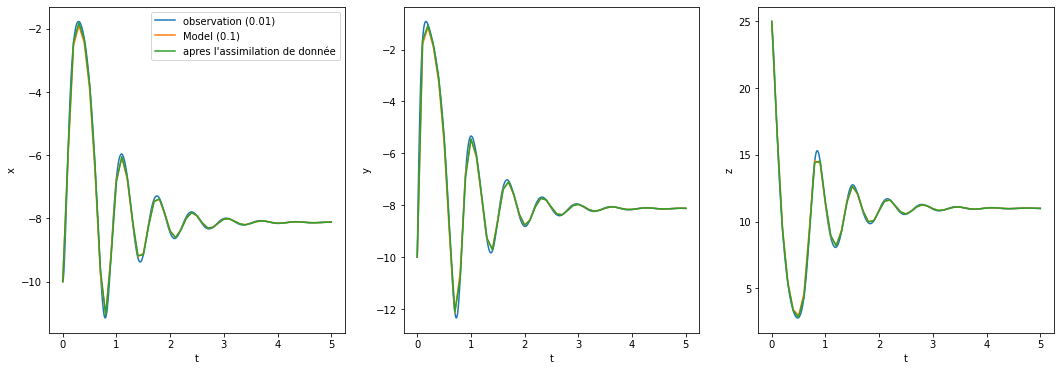

In [13]:
def hx_model(x):
   return x

R= np.eye(3)*0.01  # matrice de cov associer a la mesure
Q=np.zeros((3,3))

def read_sensor_model(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab_model,tab_temps,tab_cov_model=assimilation_donnée(x,read_sensor_model,P,Q,R,T,3,dt,N,40,hx_model,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_model)




### Observation des 3 composantes x,y,z

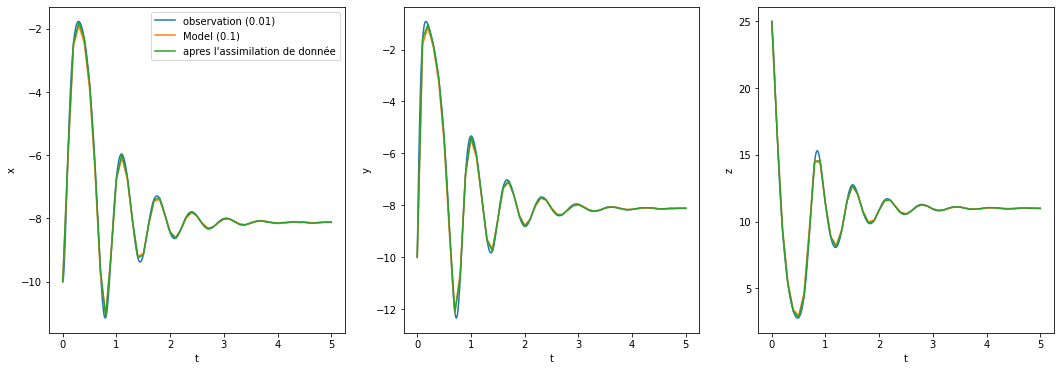

In [14]:
def hx(x):
   return x


Q=np.eye(3)*0.01
R= np.eye(3)*0.01  # matrice de cov associer a la mesure

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])




tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

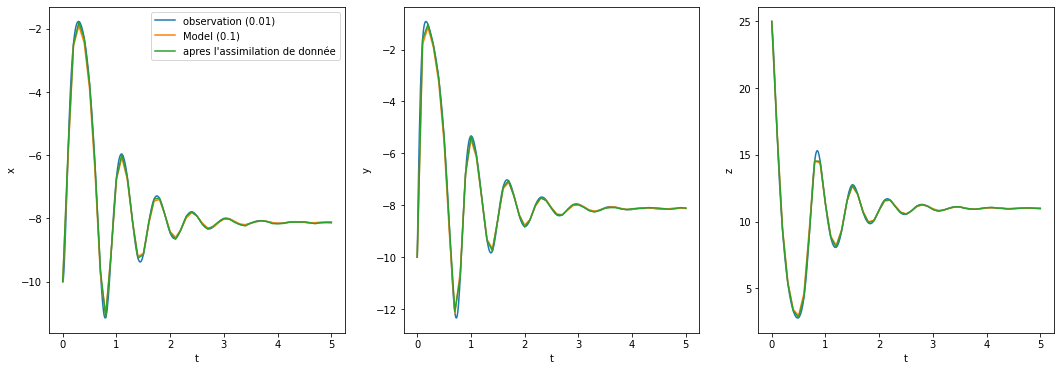

In [15]:
def hx(x):
   return x


Q=np.eye(3)*0.1
R= np.eye(3)*0.01  # matrice de cov associer a la mesure

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])




tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

### Observation uniquement de la composantes x

51
51


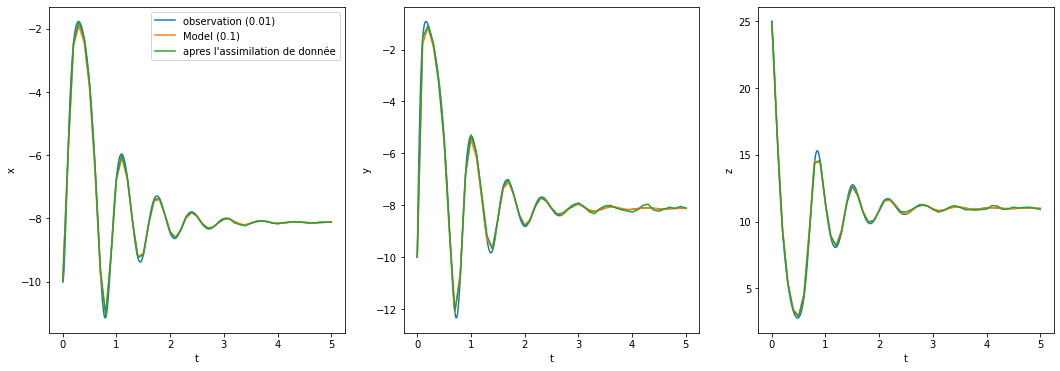

In [16]:
def hx_x(x):
   return np.array([x[0]])



R_x = np.eye(1)*0.01  # matrice de cov associer a la mesure

def read_sensor_x(index):
    return np.array([lorenz1[0][index]])



tab_x,tab_temps,tab_cov_x=assimilation_donnée(x,read_sensor_x,P,Q,R_x,T,1,dt,N,40,hx_x,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x)
print(len(tab_cov_x))
print(len(tab_x))

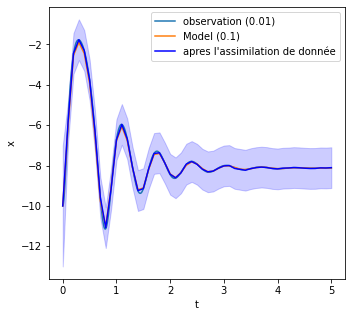

In [17]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x,1,tab_x,"t","x")

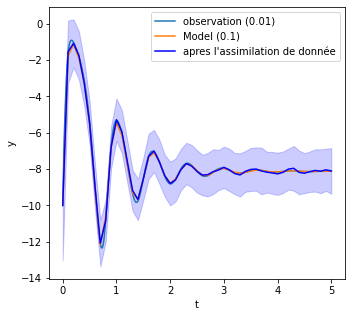

In [18]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x,1,tab_x,"t","y")

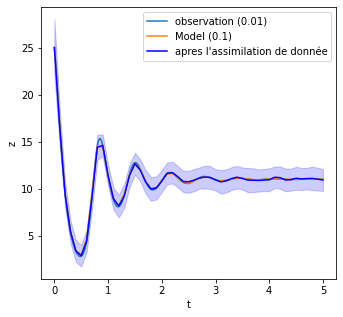

In [19]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x,1,tab_x,"t","z")

### Observation uniquement de la composantes z

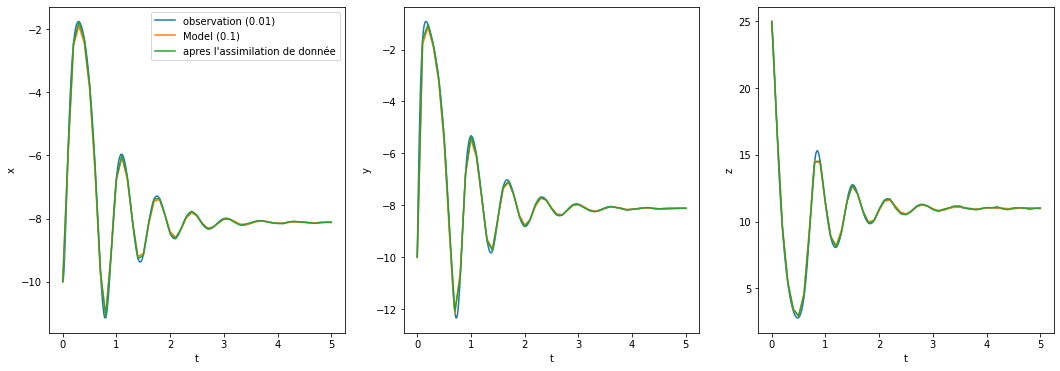

In [20]:
def hx_x_y(x):
   return np.array([x[0],x[1]])



R_x_y = np.eye(2)*0.01  # matrice de cov associer a la mesure

def read_sensor_x_y(index):
    return np.array([lorenz1[0][index],lorenz1[1][index]])



tab_x_y,tab_temps,tab_cov_x_y=assimilation_donnée(x,read_sensor_x_y,P,Q,R_x_y,T,2,dt,N,40,hx_x_y,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x_y)



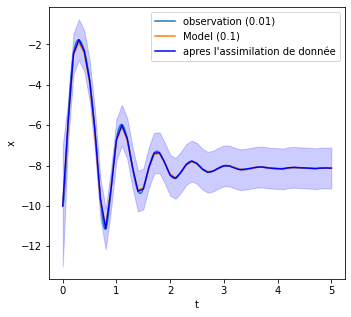

In [21]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x_y,1,tab_x_y,"t","x")

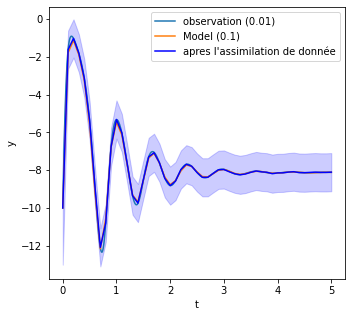

In [22]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x_y,1,tab_x_y,"t","y")

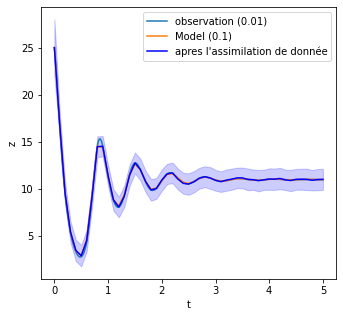

In [23]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x_y,1,tab_x_y,"t","z")

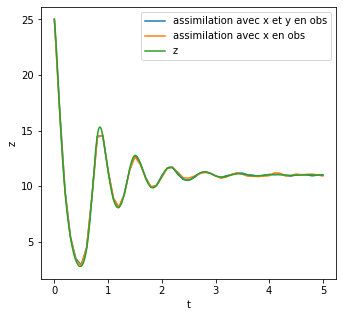

In [24]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(tab_temps,tab_x_y[:,2],label="assimilation avec x et y en obs")
ax1.plot(tab_temps,tab_x[:,2],label="assimilation avec x en obs")
ax1.plot(lorenz1[3],lorenz1[2],label="z")
plt.xlabel("t")
plt.ylabel("z")

ax1.legend()

### Observation uniquement de la composantes x et y

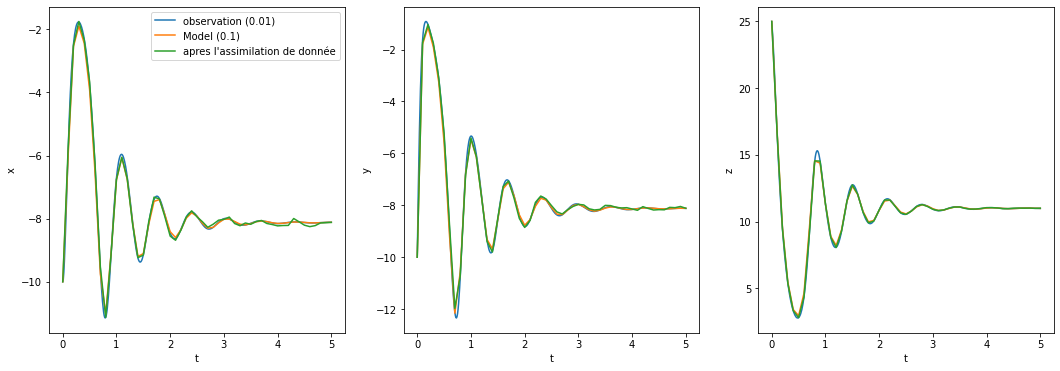

In [25]:
def hx_z(x):
   return np.array([x[2]])



R_z = np.eye(1)*0.01  # matrice de cov associer a la mesure

def read_sensor_z(index):
    return np.array([lorenz1[2][index]])



tab_z,tab_temps,tab_cov_z=assimilation_donnée(x,read_sensor_z,P,Q,R_z,T,1,dt,N,40,hx_z,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_z)

